In [12]:
import pandas as pd
import os
import sys
import numpy as np
from matplotlib import pyplot as plt
sys.path.append('..')
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
import rbf_functions

rbfs = [rbf_functions.original_rbf,
        rbf_functions.squared_exponential_rbf,
        rbf_functions.inverse_quadratic_rbf,
        rbf_functions.inverse_multiquadric_rbf,
        rbf_functions.exponential_rbf,
        rbf_functions.matern32_rbf,
        rbf_functions.matern52_rbf,
       ]

In [14]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("white")

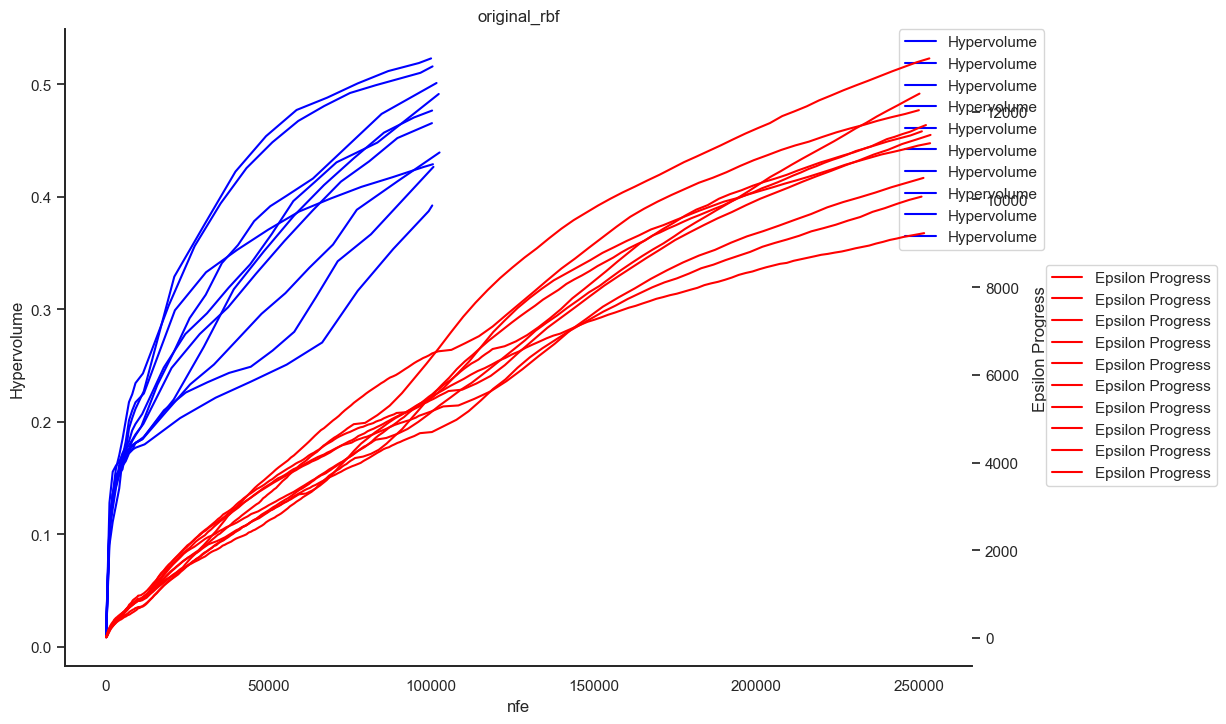

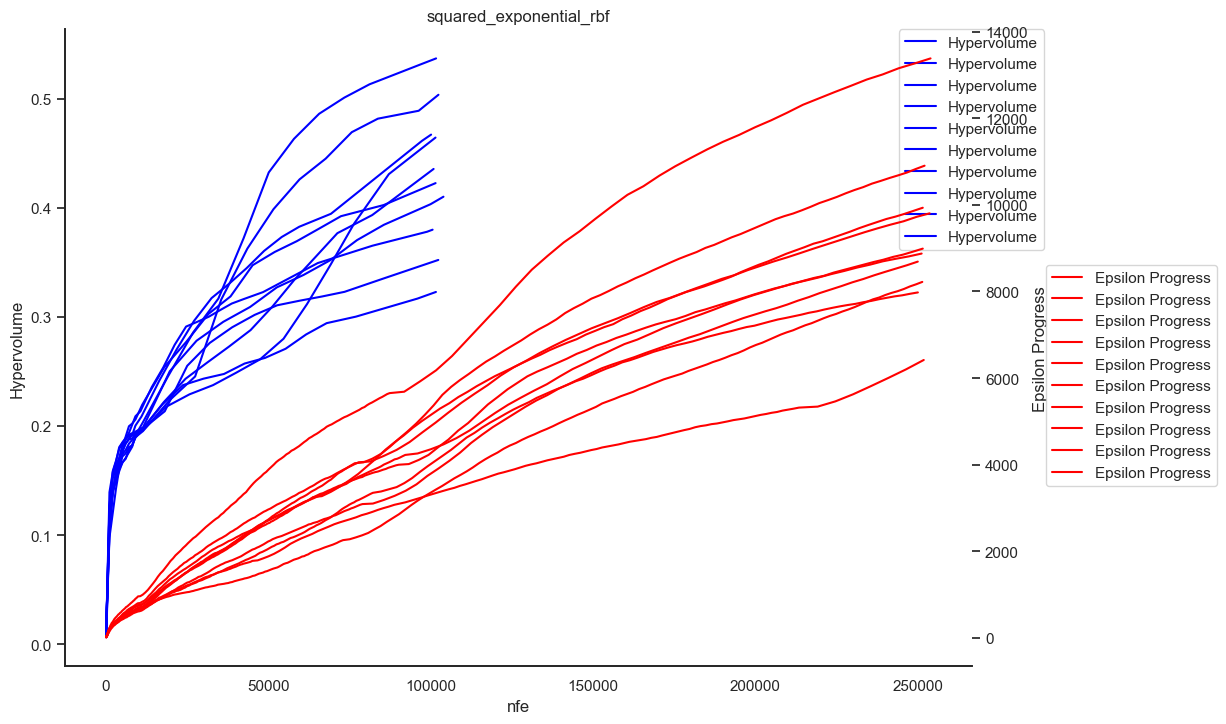

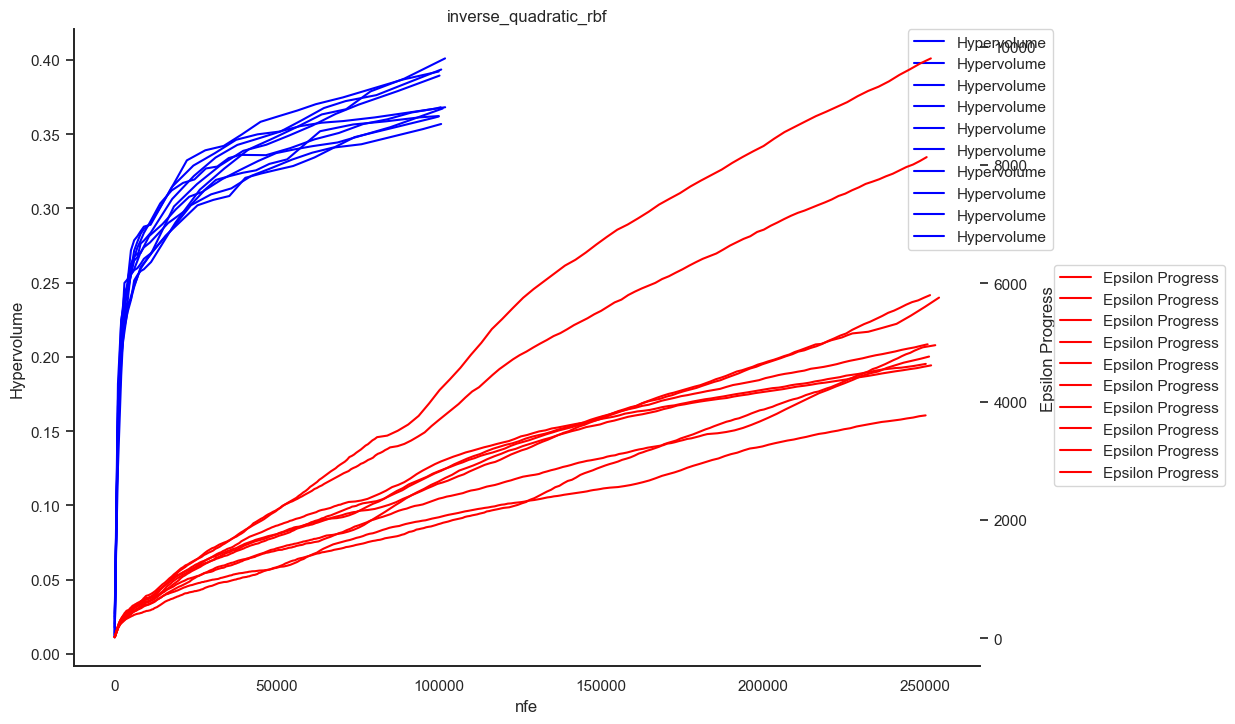

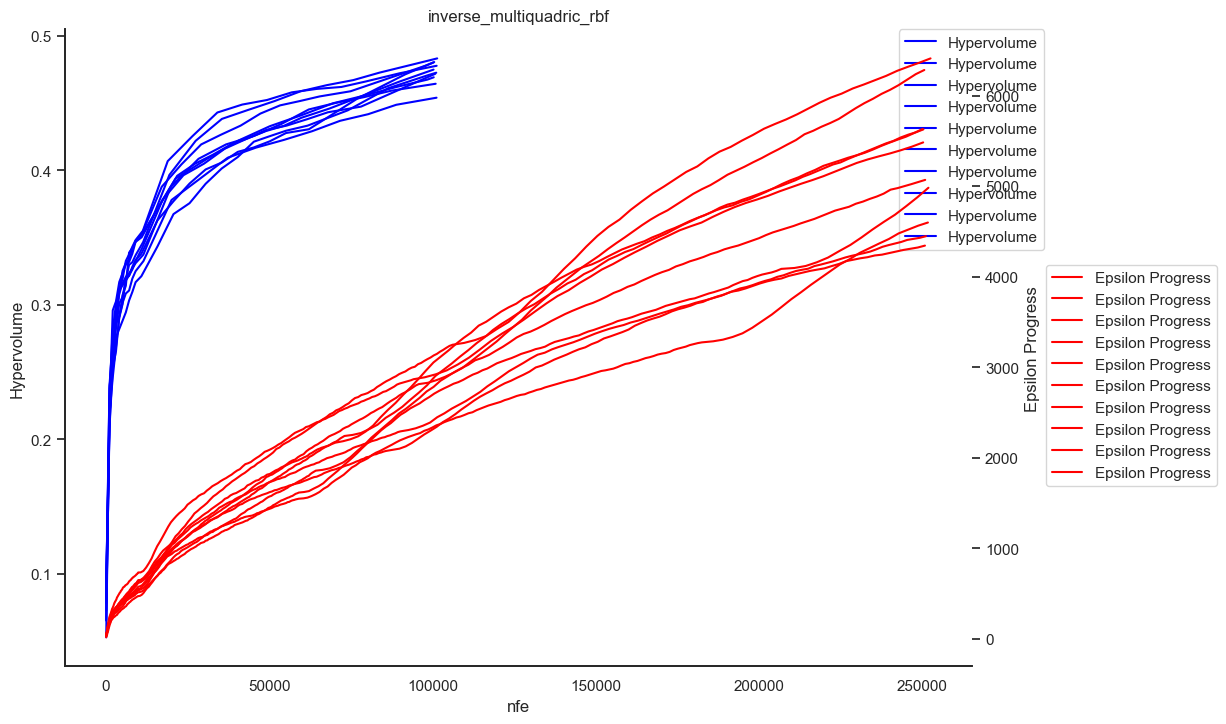

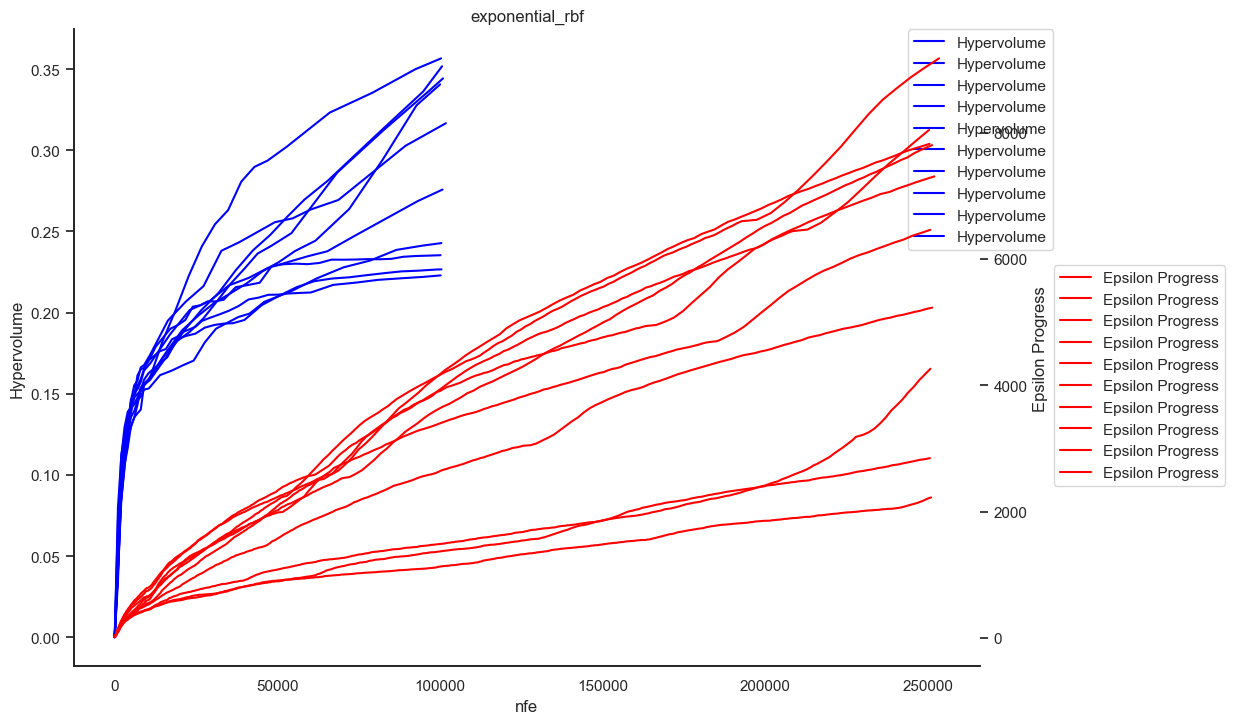

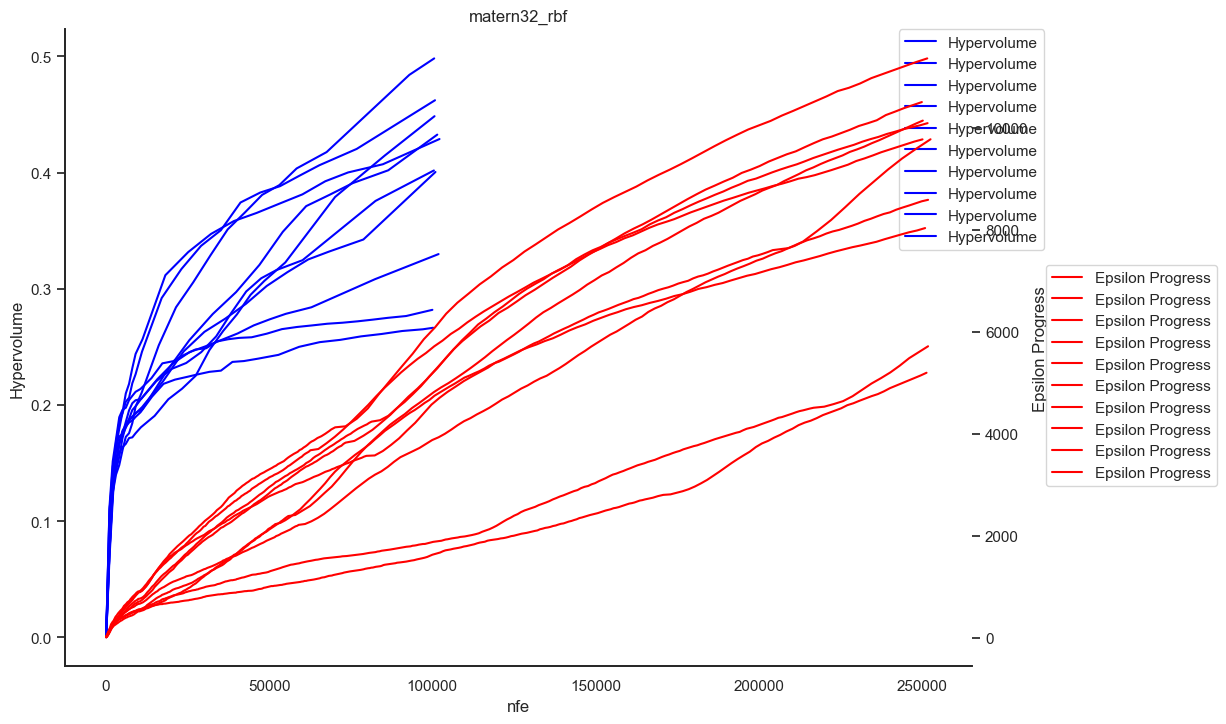

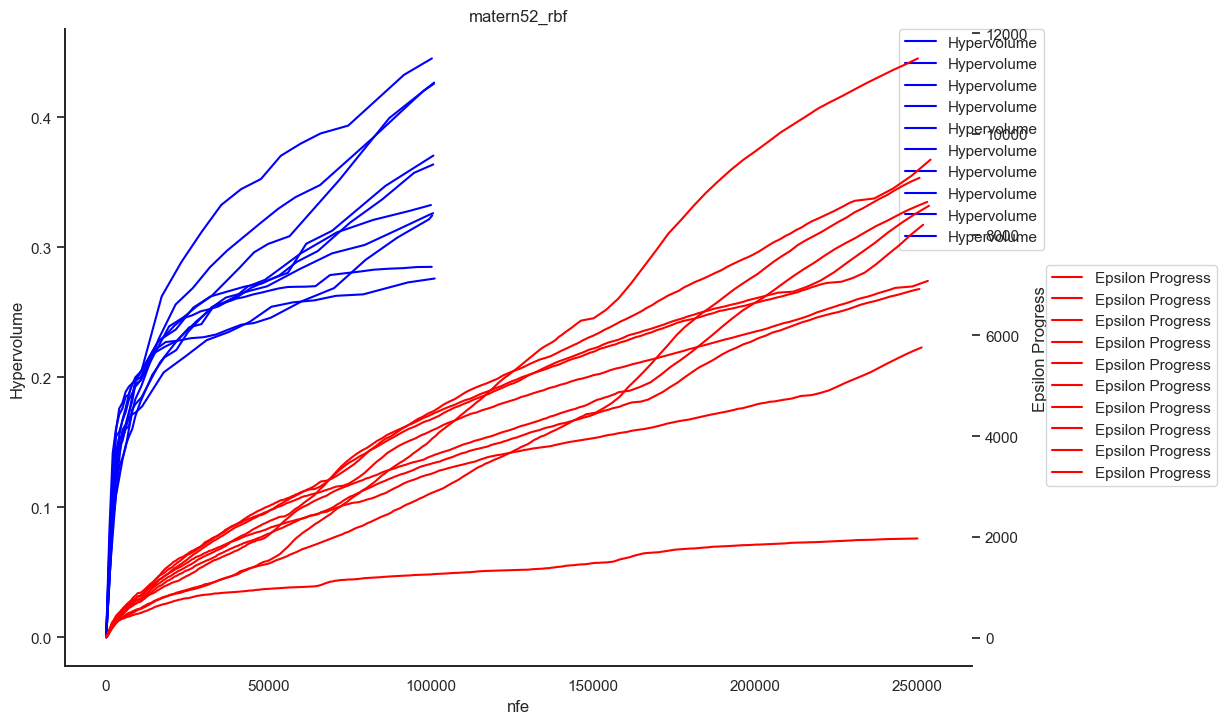

In [15]:
# Plot Hypervolume with Epsilon Progress

for entry in rbfs:
    rbf = entry.__name__
    dft_hv = pd.read_csv(f"hv/{rbf}_hv.csv")
    dft_nfe = pd.read_csv(f"hv/{rbf}_hv_nfe.csv")
    
    ep_nfe = {}
    ep_improv = {}
    output_dir = f"../output/{rbf}/"
    for i in os.listdir(output_dir):
        if i.endswith("_convergence.csv"):
            ep_load = pd.read_csv(output_dir + i)
            ep_nfe[int(i.split("_")[0])] = ep_load.nfe
            ep_improv[int(i.split("_")[0])]  = ep_load.improvements
    ep_nfe = pd.DataFrame.from_dict(ep_nfe)
    ep_improv = pd.DataFrame.from_dict(ep_improv)

    fig, ax = plt.subplots()
    ax2 = ax.twinx()

    ax.plot(dft_nfe, dft_hv, color= "blue", label="Hypervolume")
    ax2.plot(ep_nfe, ep_improv, color='red', label="Epsilon Progress")
    ax.set_xlabel('nfe')
    ax.set_ylabel('Hypervolume')
    ax2.set_ylabel('Epsilon Progress')
    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc=0)
    # ax2.legend(lines+lines2, ["Hypervolume","Epsilon Progress"], loc=0)
    ax.set_title(rbf)
    sns.despine()
    # Put the legend out of the figure
    ax.legend(bbox_to_anchor=(1.08, 1), borderaxespad=0.)
    ax2.legend(bbox_to_anchor=(1.27, 0.63), borderaxespad=0.)

    plt.show()

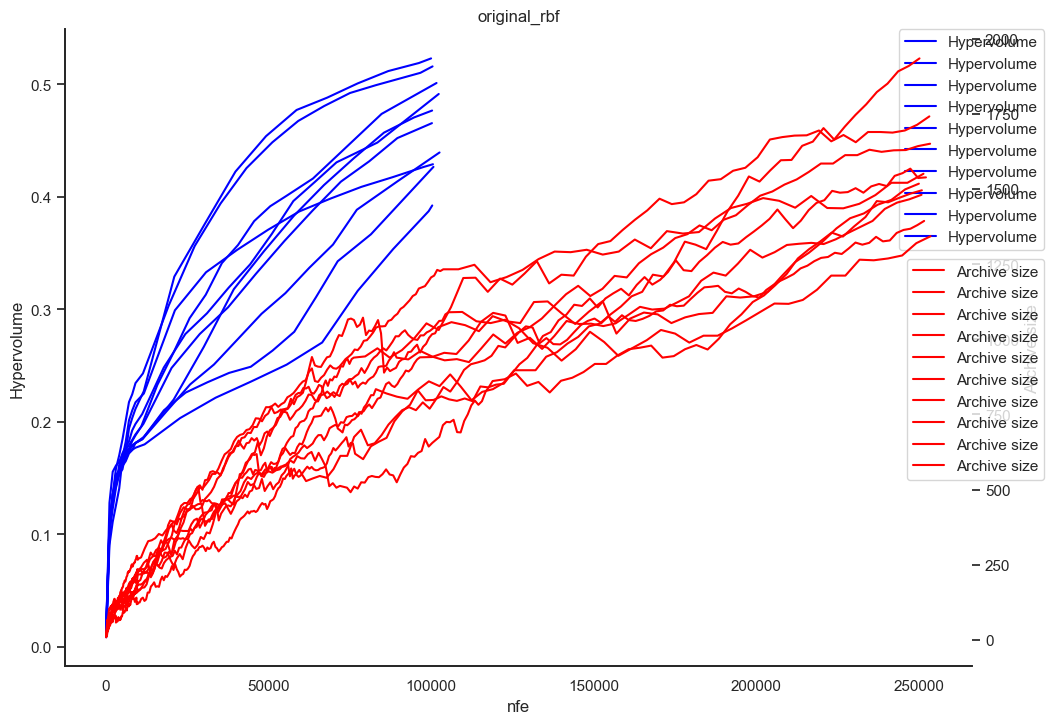

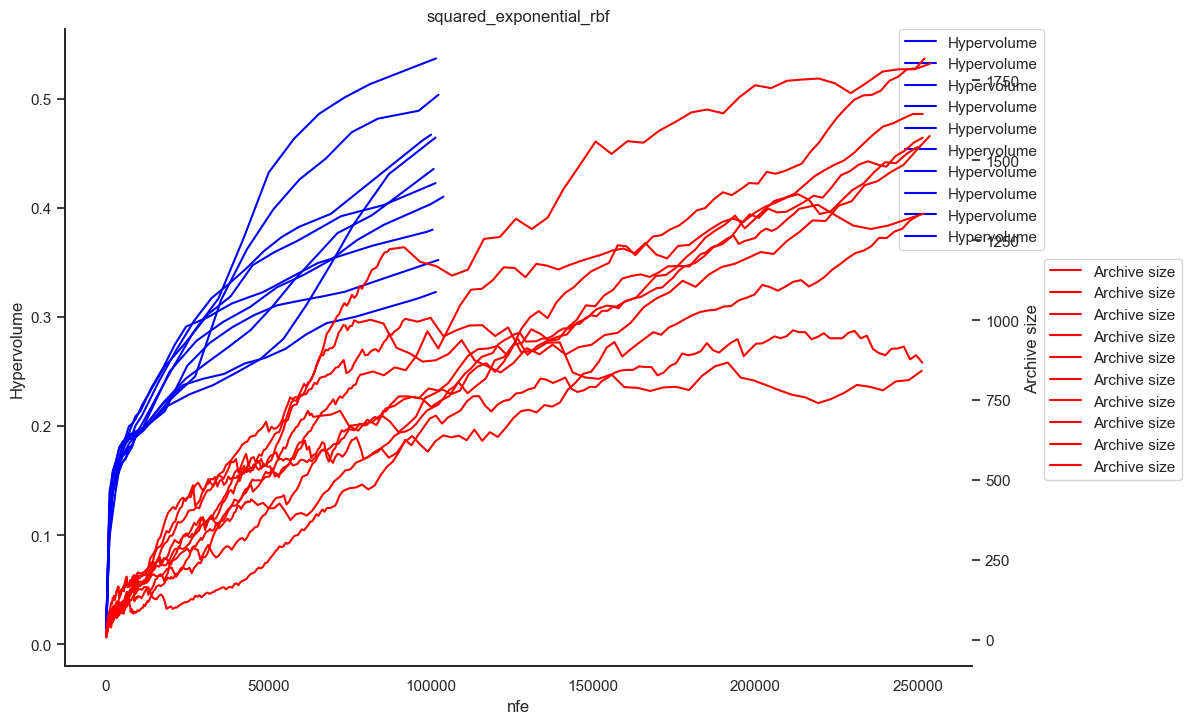

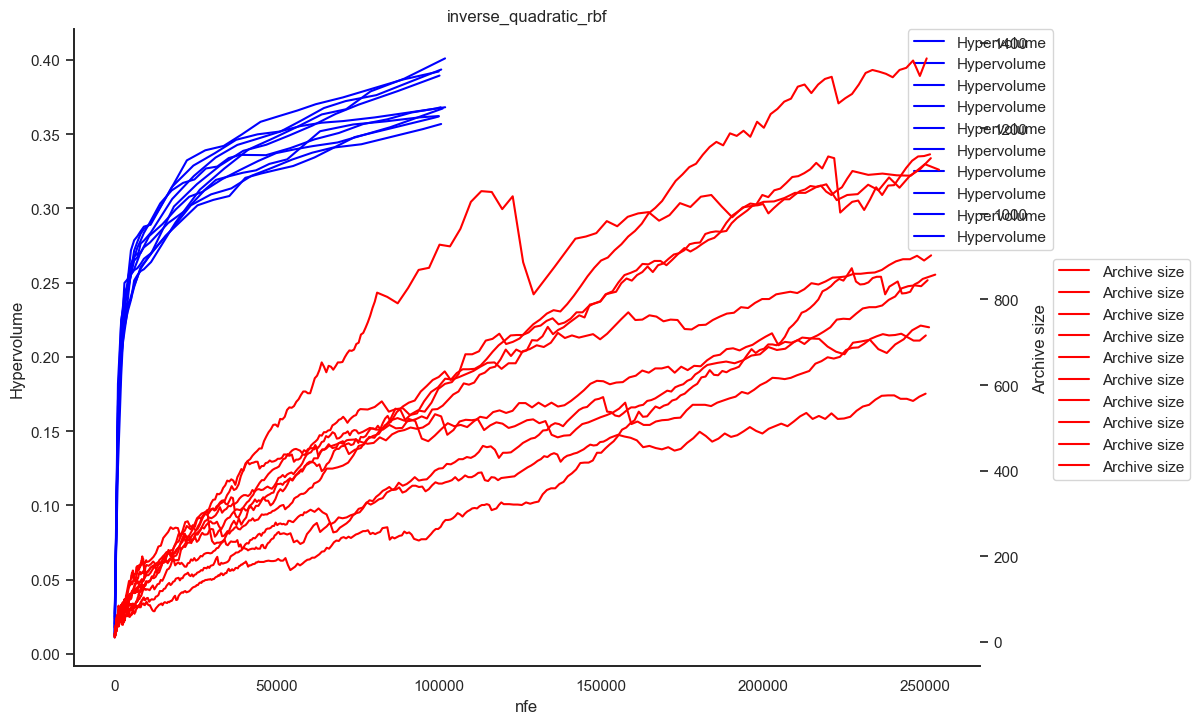

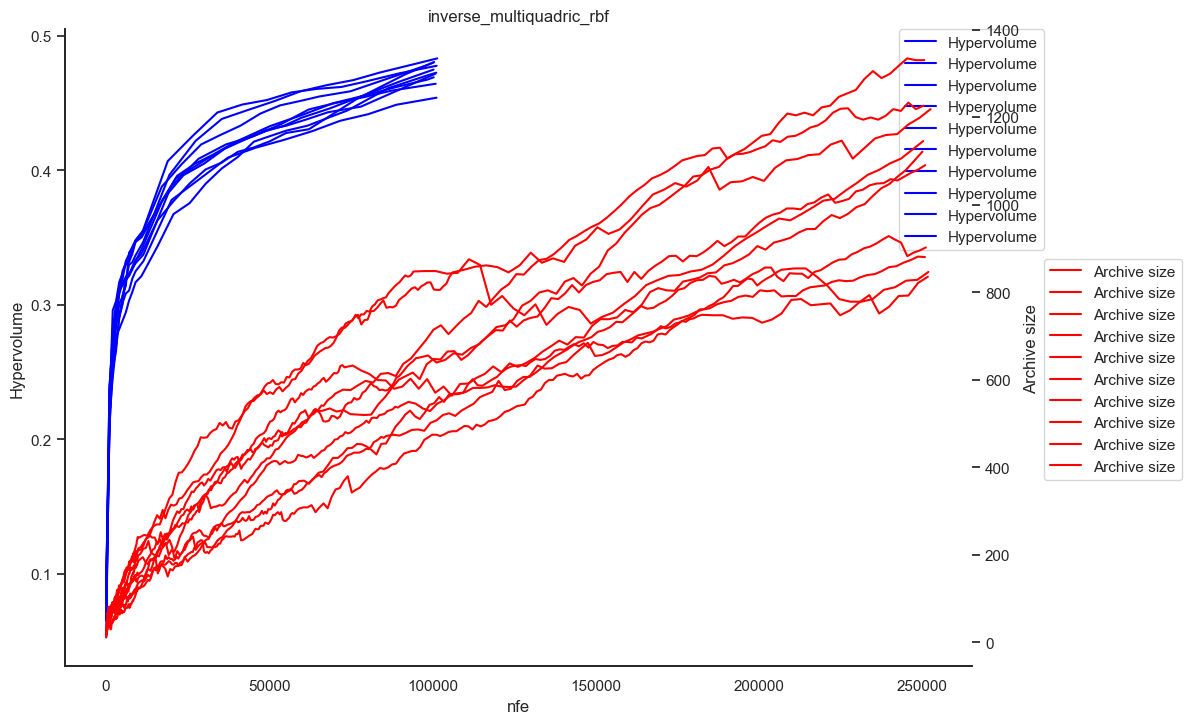

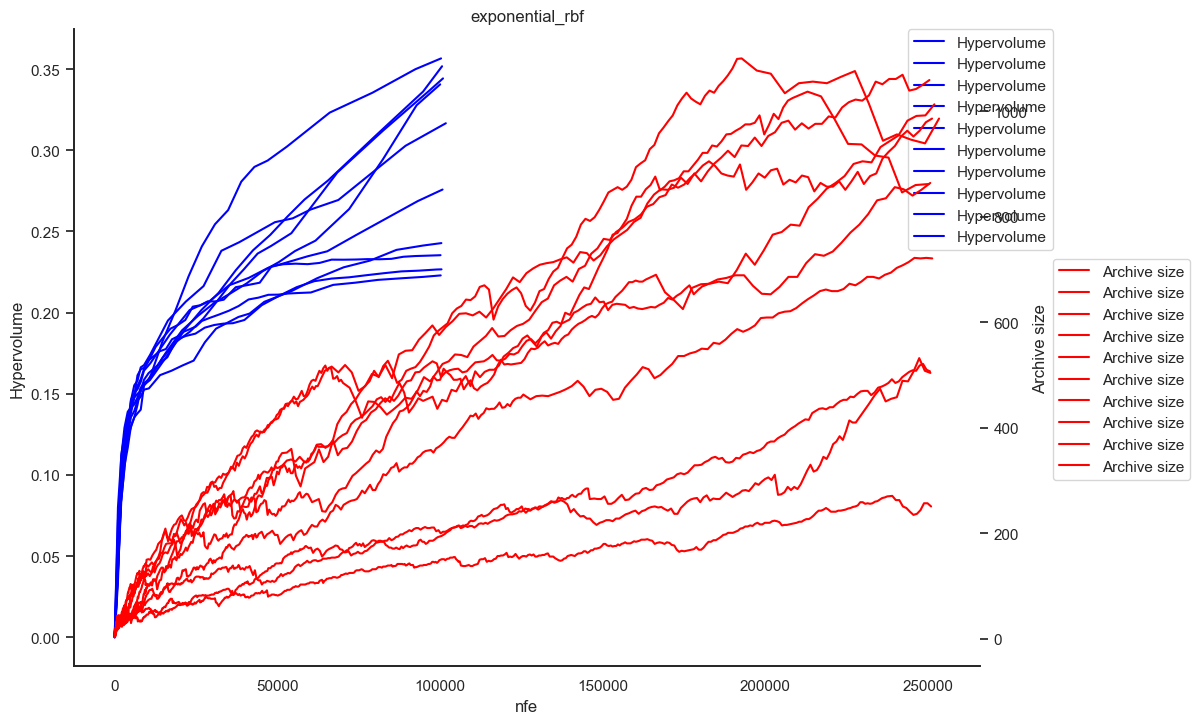

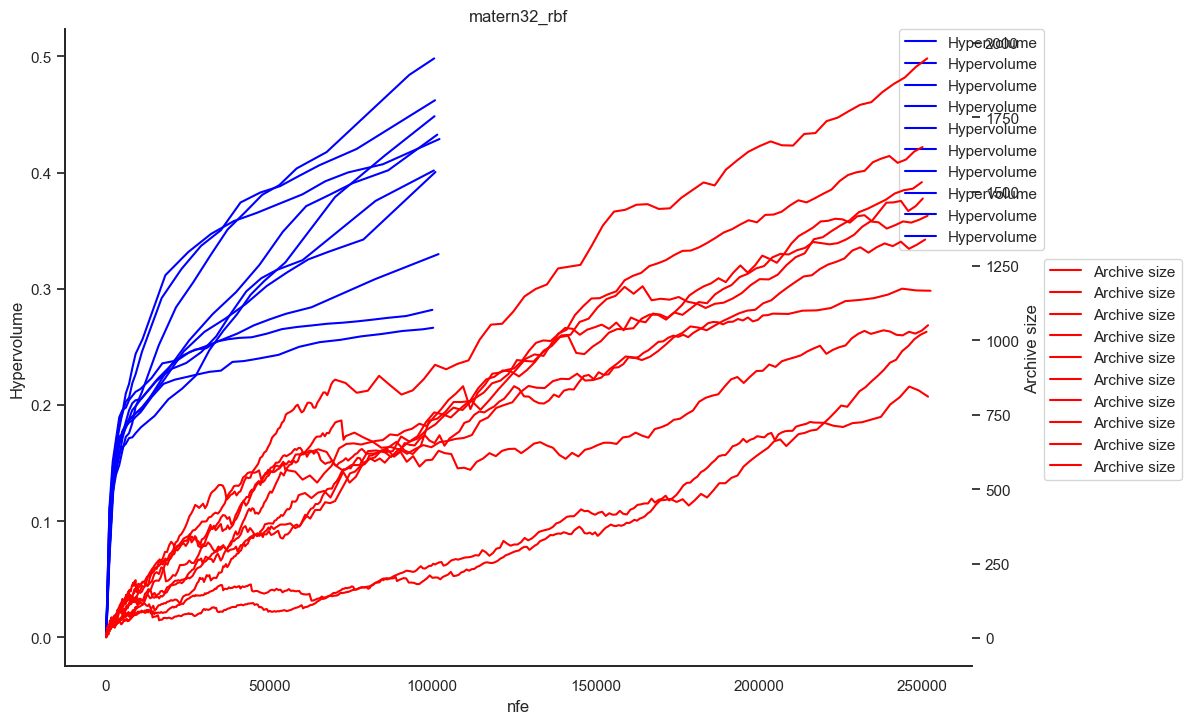

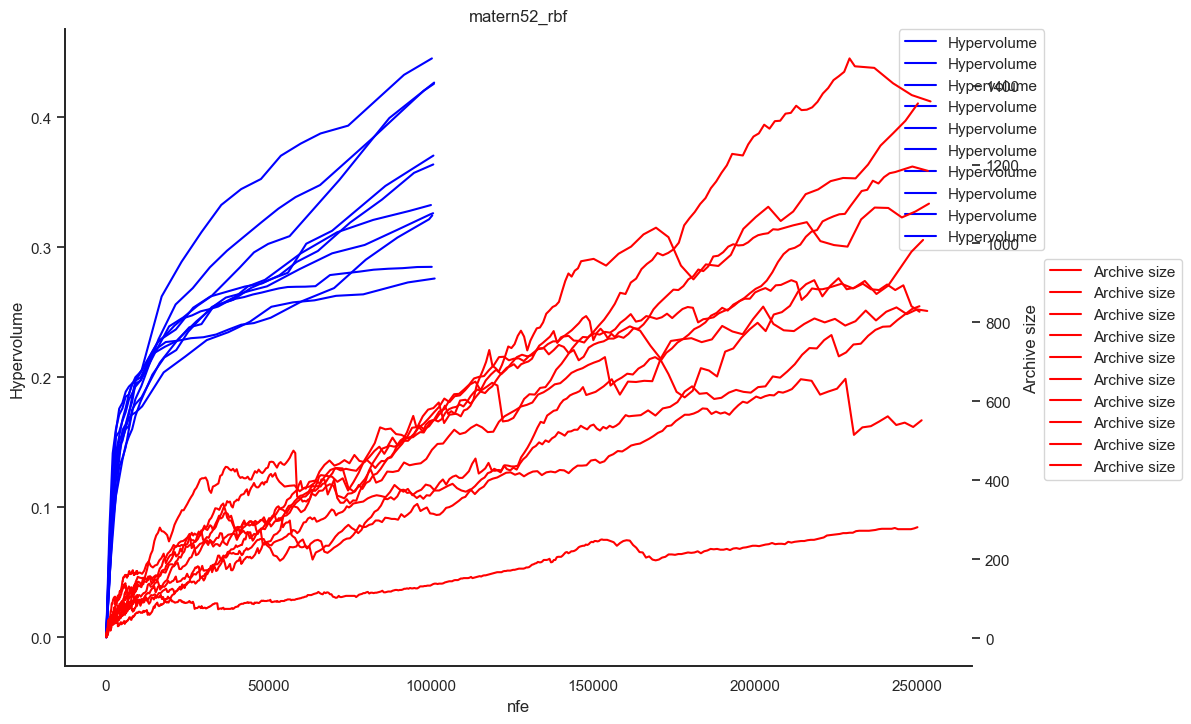

In [16]:
# Plot Hypervolume with Archive Size

for entry in rbfs:
    rbf = entry.__name__
    dft_hv = pd.read_csv(f"hv/{rbf}_hv.csv")
    dft_nfe = pd.read_csv(f"hv/{rbf}_hv_nfe.csv")
    
    archive_nfe = {}
    archive_count = {}
    output_dir = f"../output/{rbf}/"
    for i in os.listdir(output_dir):
        if i.endswith("_hypervolume.csv"):
            archives_by_nfe = pd.read_csv(output_dir + i)
            dups = archives_by_nfe.pivot_table(columns=["Unnamed: 0"], aggfunc='size')
            archive_nfe[int(i.split("_")[0])] = dups.index
            archive_count[int(i.split("_")[0])] = dups.reset_index(drop=True)

    archive_nfe = pd.DataFrame.from_dict(archive_nfe, orient='index').T
    archive_size = pd.DataFrame.from_dict(archive_count, orient='index').T

    fig, ax = plt.subplots()
    ax2 = ax.twinx()

    ax.plot(dft_nfe, dft_hv, color= "blue", label="Hypervolume")
    ax2.plot(archive_nfe, archive_size, color='red', label="Archive size")
    ax.set_xlabel('nfe')
    ax.set_ylabel('Hypervolume')
    ax2.set_ylabel('Archive size')
    lines, labels = ax.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc=0)
    # ax2.legend(lines+lines2, ["Hypervolume","Epsilon Progress"], loc=0)
    ax.set_title(rbf)
    sns.despine()
    # Put the legend out of the figure
    ax.legend(bbox_to_anchor=(1.08, 1), borderaxespad=0.)
    ax2.legend(bbox_to_anchor=(1.08, 0.64), borderaxespad=0.)

    plt.show()

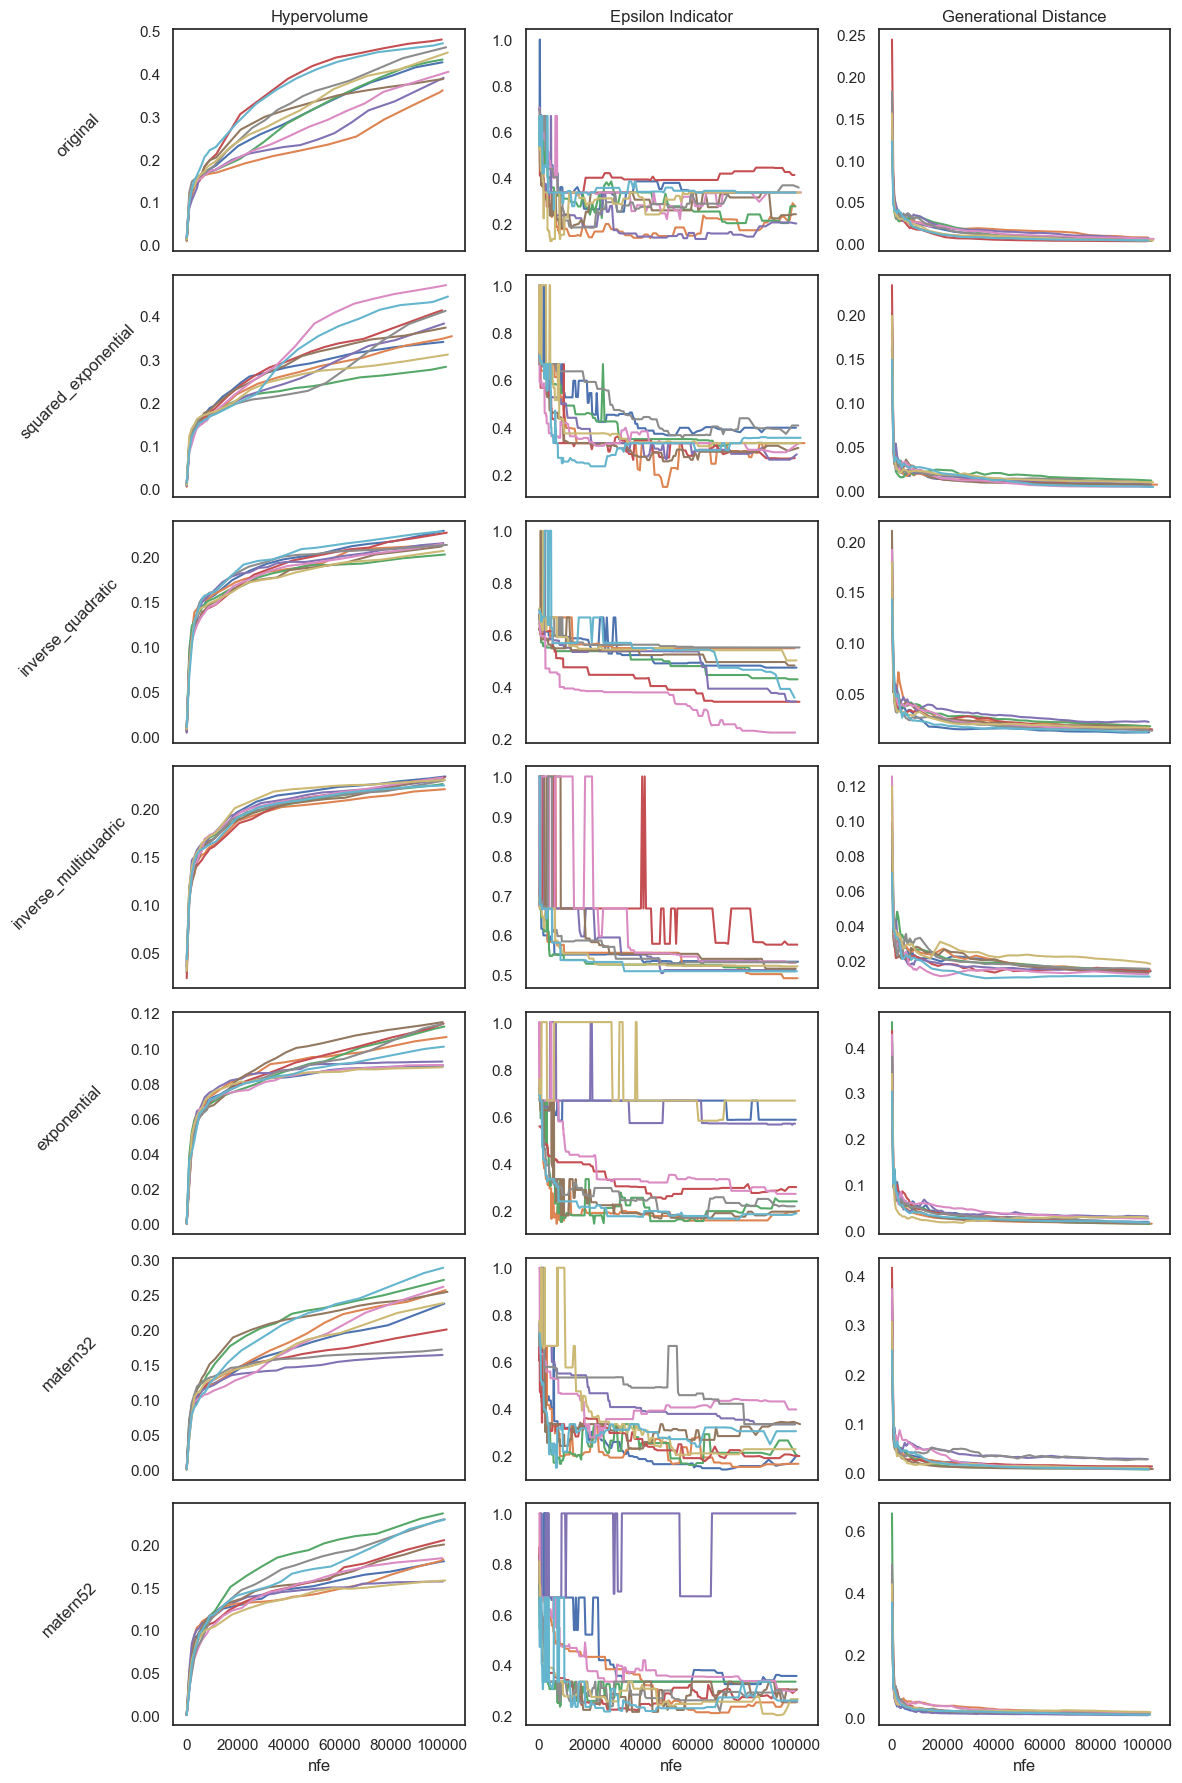

In [17]:
#https://stackoverflow.com/questions/16150819/common-xlabel-ylabel-for-matplotlib-subplots

fig, ax = plt.subplots(7, 3, sharex=True, figsize=(12,18)) #

for i, entry in enumerate(rbfs):
    rbf = entry.__name__
    df_hv = pd.read_csv(f"hv_global/{rbf}_hv_all.csv")
    df_hv_nfe = pd.read_csv(f"hv_global/{rbf}_hv_nfe_all.csv")
    df_ei = pd.read_csv(f"epind_global/{rbf}_ei_all.csv")
    df_ei_nfe = pd.read_csv(f"epind_global/{rbf}_ei_nfe_all.csv")
    df_gd = pd.read_csv(f"gd_global/{rbf}_gd_all.csv")
    df_gd_nfe = pd.read_csv(f"gd_global/{rbf}_gd_nfe_all.csv")
    ax[i,0].plot(df_hv_nfe, df_hv)
#     ax[i,0].set_title(rbf) #, loc='left'
#     ax[i,0].set_xlabel('nfe')
#     ax[i,0].set_ylabel('Hypervolume')
    ax[i,1].plot(df_ei_nfe, df_ei)
#     ax[i,1].set_title(rbf) #, loc='left'
#     ax[i,1].set_xlabel('nfe')
#     ax[i,1].set_ylabel('Epsilon Indicator')
    ax[i,2].plot(df_gd_nfe, df_gd)
#     ax[i,2].set_title(rbf) #, loc='left'
#     ax[i,2].set_xlabel('nfe')
#     ax[i,2].set_ylabel('Generational Distance')
    if i == 0:
        ax[i,0].set_title("Hypervolume")
        ax[i,1].set_title("Epsilon Indicator") #, loc='left'
        ax[i,2].set_title("Generational Distance")
    if i == len(rbfs) - 1:
        ax[i,0].set_xlabel("nfe")
        ax[i,1].set_xlabel("nfe")
        ax[i,2].set_xlabel("nfe")
    ax[i,0].set_ylabel(rbf[:-4], rotation=45, labelpad=40)        
fig.tight_layout()
# fig.suptitle('RBF metrics compared')


In [18]:
def make_square_axes(ax):
    """Make an axes square in screen units.

    Should be called after plotting.
    """
    ax.set_aspect(1 / ax.get_data_ratio())

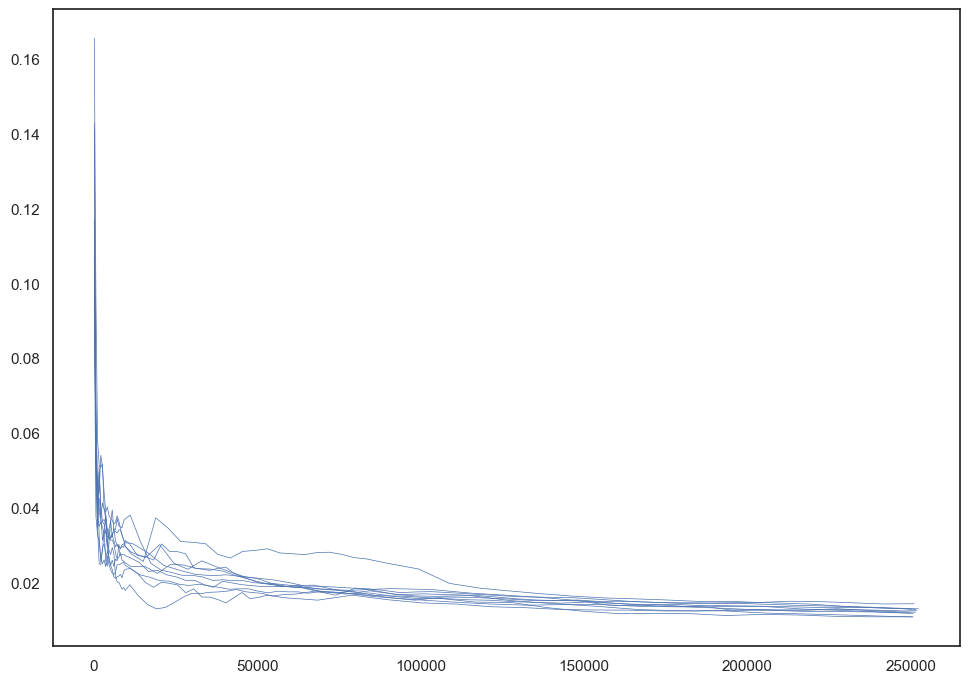

In [24]:
df_gd = pd.read_csv(f"gd/gd_global/inverse_multiquadric_rbf_gd_all.csv")
df_gd_nfe = pd.read_csv(f"gd/gd_global/inverse_multiquadric_rbf_gd_nfe_all.csv")
plt.plot(df_gd_nfe, df_gd, color=c, lw=0.5)

FileNotFoundError: [Errno 2] No such file or directory: 'hv_global/original_rbf_hv_all.csv'

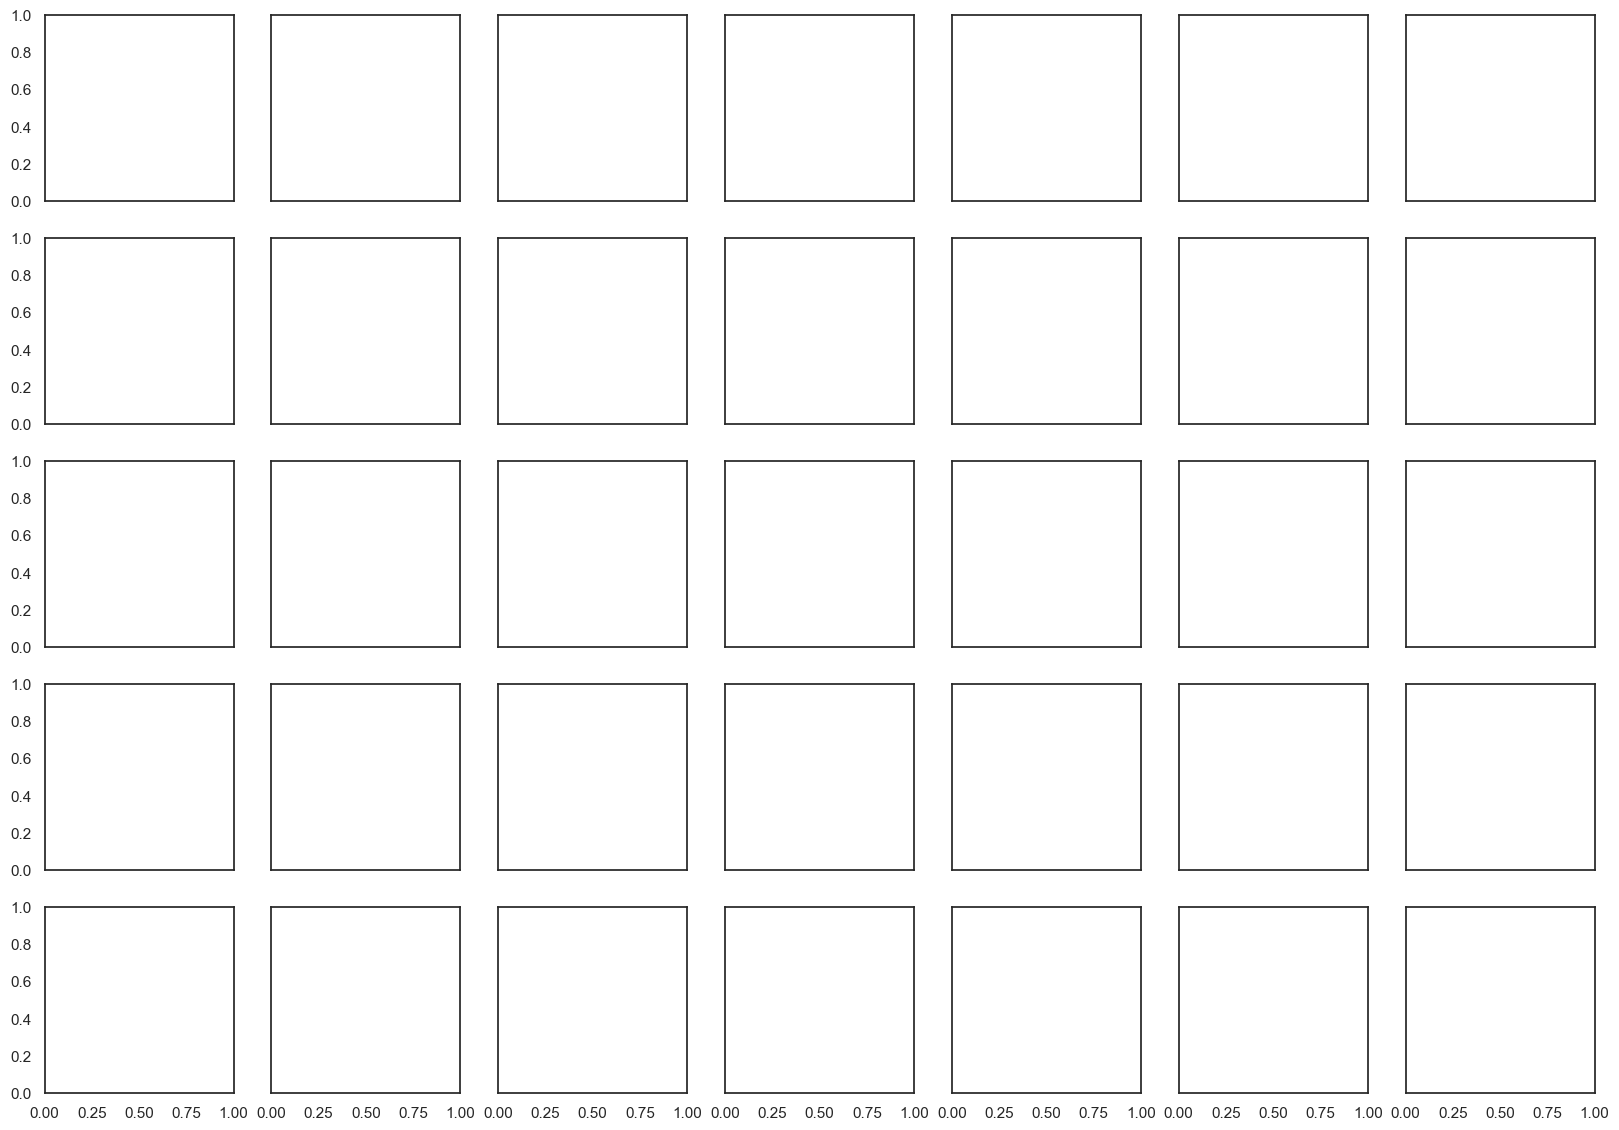

In [20]:
fig, ax = plt.subplots(5, 7, sharex=True, sharey='row', figsize=(20,14)) #


# for i, entry in enumerate(rbfs):
for i, (entry, c) in enumerate(zip(rbfs, sns.color_palette())):
    rbf = entry.__name__
    df_hv = pd.read_csv(f"hv_global/{rbf}_hv_all.csv")
    df_hv_nfe = pd.read_csv(f"hv_global/{rbf}_hv_nfe_all.csv")
    df_ei = pd.read_csv(f"epind_global/{rbf}_ei_all.csv")
    df_ei_nfe = pd.read_csv(f"epind_global/{rbf}_ei_nfe_all.csv")
    df_gd = pd.read_csv(f"gd_global/{rbf}_gd_all.csv")
    df_gd_nfe = pd.read_csv(f"gd_global/{rbf}_gd_nfe_all.csv")
    ep_nfe = {}
    ep_prog = {}
    archive_nfe = {}
    archive_count = {}
    out_dir = f"../output/{rbf}/"
    for j in os.listdir(out_dir):
        if j.endswith("_convergence.csv"):
            ep_load = pd.read_csv(out_dir + j)
            ep_nfe[int(j.split("_")[0])] = ep_load.nfe
            ep_prog[int(j.split("_")[0])]  = ep_load.improvements
        if j.endswith("_hypervolume.csv"):
            archives_by_nfe = pd.read_csv(out_dir + j)
            dups = archives_by_nfe.pivot_table(columns=["Unnamed: 0"], aggfunc='size')
            archive_nfe[int(j.split("_")[0])] = dups.index
            archive_count[int(j.split("_")[0])] = dups.reset_index(drop=True)
    ep_nfe = pd.DataFrame.from_dict(ep_nfe)
    ep_prog = pd.DataFrame.from_dict(ep_prog)
    archive_nfe = pd.DataFrame.from_dict(archive_nfe, orient='index').T
    archive_size = pd.DataFrame.from_dict(archive_count, orient='index').T   
    
    ax[0,i].plot(df_gd_nfe, df_gd, color=c, lw=0.5)
    ax[1,i].plot(df_ei_nfe, df_ei, color=c, lw=0.5)
    ax[2,i].plot(df_hv_nfe, df_hv, color=c, lw=0.5)
    
    ax[3,i].plot(ep_nfe, ep_prog, color=c, lw=0.5)
    ax[4,i].plot(archive_nfe, archive_size, color=c, lw=0.5)
    ax[0,i].set_aspect(1 / ax[0,i].get_data_ratio())
    ax[1,i].set_aspect(1 / ax[1,i].get_data_ratio())
    ax[2,i].set_aspect(1 / ax[2,i].get_data_ratio())
    ax[3,i].set_aspect(1 / ax[3,i].get_data_ratio())
    ax[4,i].set_aspect(1 / ax[4,i].get_data_ratio())
#     print(ax[2,i].get_data_ratio())
    if i == 0: 
        ax[2,i].set_ylabel("Hypervolume", labelpad=12) #, rotation=45, labelpad=40
        ax[1,i].set_ylabel("Epsilon Indicator", labelpad=12)
        ax[0,i].set_ylabel("Generational Distance", labelpad=12)
        ax[3,i].set_ylabel("Epsilon Progress", labelpad=4)
        ax[4,i].set_ylabel("Archive Size", labelpad=4)
    ax[4,i].set_xlabel("nfe")
    ax[0,i].set_title(rbf[:-4])
 
fig.tight_layout()
# fig.suptitle('RBF metrics compared')
plt.savefig(f'figs/metrics_combined.png')
plt.savefig(f'figs/metrics_combined.pdf')